In [18]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [35]:
train_dir = "train"
val_dir = "val"
cat_train_data = os.path.join(train_dir,"cat")
dog_train_data = os.path.join(train_dir,"dog")

In [9]:
print(os.listdir(cat_train_data)[:4])
print("*"*20)
print(os.listdir(dog_train_data)[:4])


['Persian_123_jpg.rf.87d8ed5ba94b1f22d92cee480bf0cb46.jpg', 'Bengal_167_jpg.rf.1542d3551f036a577880f22719c2fd08.jpg', 'British_Shorthair_187_jpg.rf.24d36402bce6b82092dc93876c65bb71.jpg', 'Ragdoll_160_jpg.rf.625334e2d1ce3b4e412899793b2da250.jpg']
********************
['scottish_terrier_135_jpg.rf.375edbbae7ccb25c6827c6764c992e47.jpg', 'scottish_terrier_174_jpg.rf.8bc99774a9febce2195b812ac0d71f3b.jpg', 'leonberger_169_jpg.rf.26714dcd11d5fb21a7f6af5401377f6c.jpg', 'english_setter_190_jpg.rf.bd4261986204eab15f361ed91ad1697f.jpg']


In [12]:
print(len(os.listdir(cat_train_data)))
print(len(os.listdir(dog_train_data)))

95
180


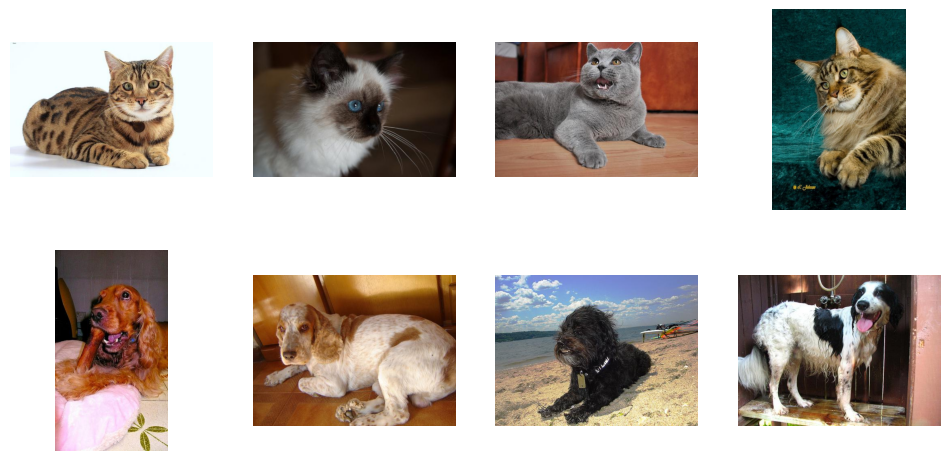

In [28]:
n_rows = 4
n_cols = 4

fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows *3)


next_cat_images = [os.path.join(cat_train_data,f_name) for f_name in random.sample(os.listdir(cat_train_data), k = 4)]
next_dog_images = [os.path.join(dog_train_data,f_name) for f_name in random.sample(os.listdir(dog_train_data), k = 4)]

for i, img_path in enumerate(next_cat_images + next_dog_images):
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis("off")
    img = mpimg.imread(img_path)

    plt.imshow(img)
plt.show()

In [29]:
[fname for fname in os.listdir(cat_train_data)[:5]]

['Persian_123_jpg.rf.87d8ed5ba94b1f22d92cee480bf0cb46.jpg',
 'Bengal_167_jpg.rf.1542d3551f036a577880f22719c2fd08.jpg',
 'British_Shorthair_187_jpg.rf.24d36402bce6b82092dc93876c65bb71.jpg',
 'Ragdoll_160_jpg.rf.625334e2d1ce3b4e412899793b2da250.jpg',
 'Bengal_145_jpg.rf.3dadbfbb39437890fc249f7edb37cb2f.jpg']

In [38]:
model = tf.keras.models.Sequential(
    [
        tf.keras.Input((150, 150, 3)),

        tf.keras.layers.Conv2D(16, (3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        
        tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(528, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "sigmoid")
    ]
)

In [48]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size = 32,
    image_size = (150, 150),
    label_mode = 'binary'
)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    batch_size = 32,
    image_size = (150,150),
    label_mode = "binary"
)

Found 275 files belonging to 2 classes.
Found 70 files belonging to 2 classes.


In [ ]:
model.compile(
    optimizer = tf.optimizers.RMSprop(learning_rate = 1e-5),
    loss =  tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
    metrics = [tf.keras.metrics.BinaryAccuracy(name="Accuracy")]
)

In [50]:
train_set_rescaled = train_dataset.map(lambda image,label : (tf.keras.layers.Rescaling(scale = 1./255)(image),label))
val_set_rescaled = validation_dataset.map(lambda image,label: (tf.keras.layers.Rescaling(scale = 1./255)(image),label))

In [51]:
SHUFFLE_BUFFER_SIZE = 50
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = train_set_rescaled.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final = val_set_rescaled.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [53]:
model.fit(
    train_dataset_final,
    validation_data = validation_dataset_final,
    epochs = 15,
    verbose = 2
)

Epoch 1/15
3/3 - 1s - 172ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.5891 - val_loss: 1.5705
Epoch 2/15
3/3 - 1s - 193ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.6073 - val_loss: 1.7612
Epoch 3/15
3/3 - 1s - 189ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.5927 - val_loss: 1.7796
Epoch 4/15
3/3 - 1s - 187ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.5600 - val_loss: 1.8430
Epoch 5/15
3/3 - 1s - 187ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.5891 - val_loss: 1.9311
Epoch 6/15
3/3 - 1s - 195ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.5964 - val_loss: 2.0479
Epoch 7/15
3/3 - 1s - 193ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.5927 - val_loss: 2.1315
Epoch 8/15
3/3 - 1s - 187ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.5927 - val_loss: 2.1591
Epoch 9/15
3/3 - 1s - 189ms/step - accuracy: 1.0000 - loss: 7.2155e-04 - val_accuracy: 0.5745 - val_loss: 2.1755
Epoch 10/15
3/3